In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('HRDataset_v14.csv', sep=",")

In [3]:
print("Размер таблицы: ", data.shape)

Размер таблицы:  (311, 36)


In [4]:
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0.0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,NaN,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,NaN,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1.0,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0.0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [5]:
data.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                     float64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [6]:
# Сумма пропущенных значений
isnull = data.isnull().sum()
print(isnull)

Employee_Name                   0
EmpID                           0
MarriedID                      20
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                       20
DateofHire                      0
DateofTermination             207
TermReason                    207
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

# 2. Обработка данных
## 2.1. Удаление значений

In [8]:
# Удаление столбцов
newdata1 = data.dropna(axis=1)
newdata1.shape

(311, 31)

In [9]:
newdata1.dtypes

Employee_Name                  object
EmpID                           int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
DateofHire                     object
EmploymentStatus               object
Department                     object
ManagerName                    object
RecruitmentSource              object
PerformanceScore               object
EngagementSurvey              float64
EmpSatisfact

In [10]:
# Удаление строк
newdata2 = data.dropna(axis=0)
newdata2.shape

(88, 36)

In [11]:
mass1 = []
mass2 = []
mass3 = []
for key in isnull.keys():
    elem = []
    if isnull[key] != 0:
        elem.append(key)
        elem.append(data[key].dtype)
        elem.append(isnull[key])
        elem.append(round(isnull[key] / data.shape[0] * 100, 5))
        mass1.append(elem)
    if isnull[key] != 0 and (str(data[key].dtype) == 'float64' or str(data[key].dtype) == 'int64'):
        mass2.append(elem)
    if isnull[key] != 0 and str(data[key].dtype) == 'object':
        mass3.append(elem)
data_num_obj = []
for key in mass1:
    data_num_obj.append(key[0])
    print("{} - {} - ({}) {}%".format(key[0], key[1], key[2], key[3]))

MarriedID - float64 - (20) 6.43087%
RaceDesc - object - (20) 6.43087%
DateofTermination - object - (207) 66.55949%
TermReason - object - (207) 66.55949%
ManagerID - float64 - (8) 2.57235%


In [12]:
data_num = []
for key in mass2:
    data_num.append(key[0])
    print("{} - {} - ({}) {}%".format(key[0], key[1], key[2], key[3]))

MarriedID - float64 - (20) 6.43087%
ManagerID - float64 - (8) 2.57235%


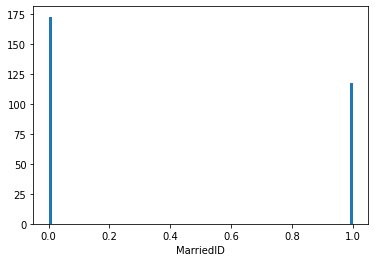

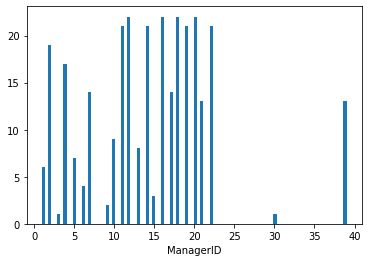

In [13]:
for key in mass2:
    plt.hist(data[key[0]], 100)
    plt.xlabel(key[0])
    plt.show()

# SimpleImputer

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [16]:
sort_null_data = data[data_num]
data_MarriedID = sort_null_data[['MarriedID']]
data_MarriedID.head()

,MarriedID
0,0.0
1,NaN
2,NaN
3,1.0
4,0.0


In [17]:
implicator = MissingIndicator()
values = implicator.fit_transform(data_MarriedID)
values

array([[False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [18]:
strategies = ['mean', 'median', 'most_frequent']

In [19]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_MarriedID)
    return data_num_imp[values]

In [20]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([0.40549828, 0.40549828, 0.40549828, 0.40549828, 0.40549828,
        0.40549828, 0.40549828, 0.40549828, 0.40549828, 0.40549828,
        0.40549828, 0.40549828, 0.40549828, 0.40549828, 0.40549828,
        0.40549828, 0.40549828, 0.40549828, 0.40549828, 0.40549828]))

In [21]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]))

In [22]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]))

# Обработка категориальных признаков

In [24]:
for key in mass3:
    print("{} - {} - ({}) {}%".format(key[0], key[1], key[2], key[3]))

RaceDesc - object - (20) 6.43087%
DateofTermination - object - (207) 66.55949%
TermReason - object - (207) 66.55949%


In [25]:
sort_null_data_obj = data[data_num_obj]
data_RaceDesc = sort_null_data_obj[['RaceDesc']]
data_RaceDesc.head()

,RaceDesc
0,White
1,NaN
2,White
3,White
4,White


In [26]:
implicator = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
RaceDesc_values = implicator.fit_transform(data_RaceDesc)
RaceDesc_values

array([['White'],
       ['NA'],
       ['White'],
       ['White'],
       ['White'],
       ['White'],
       ['White'],
       ['NA'],
       ['Black or African American'],
       ['White'],
       ['Black or African American'],
       ['Black or African American'],
       ['Black or African American'],
       ['Two or more races'],
       ['White'],
       ['White'],
       ['White'],
       ['White'],
       ['White'],
       ['NA'],
       ['White'],
       ['Asian'],
       ['White'],
       ['NA'],
       ['White'],
       ['Black or African American'],
       ['NA'],
       ['Asian'],
       ['White'],
       ['Black or African American'],
       ['White'],
       ['Black or African American'],
       ['Black or African American'],
       ['Black or African American'],
       ['White'],
       ['White'],
       ['White'],
       ['White'],
       ['Black or African American'],
       ['Black or African American'],
       ['White'],
       ['White'],
       ['White'],
       ['

In [27]:
np.unique(RaceDesc_values)

array(['American Indian or Alaska Native', 'Asian',
       'Black or African American', 'Hispanic', 'NA', 'Two or more races',
       'White'], dtype=object)

# Кодирование категориальных признаков

In [30]:
data_frame = pd.DataFrame({'RaceDesc': RaceDesc_values.T[0]})

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [33]:
le = LabelEncoder()
data_label_en = le.fit_transform(data_frame)

In [34]:
data_frame['RaceDesc'].unique()

array(['White', 'NA', 'Black or African American', 'Two or more races',
       'Asian', 'American Indian or Alaska Native', 'Hispanic'],
      dtype=object)

In [35]:
data_label_en

array([6, 4, 6, 6, 6, 6, 6, 4, 2, 6, 2, 2, 2, 5, 6, 6, 6, 6, 6, 4, 6, 1,
       6, 4, 6, 2, 4, 1, 6, 2, 6, 2, 2, 2, 6, 6, 6, 6, 2, 2, 6, 6, 6, 6,
       6, 2, 6, 2, 6, 6, 6, 6, 6, 2, 6, 4, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6,
       2, 5, 4, 6, 6, 6, 6, 2, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 2,
       2, 6, 6, 6, 6, 6, 6, 6, 2, 6, 2, 6, 6, 2, 2, 2, 2, 2, 5, 6, 6, 6,
       6, 2, 2, 6, 6, 6, 4, 1, 6, 6, 2, 5, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6,
       2, 6, 6, 6, 6, 1, 6, 2, 6, 0, 6, 6, 1, 6, 2, 6, 6, 6, 6, 6, 6, 2,
       1, 2, 6, 6, 1, 6, 2, 6, 1, 1, 6, 1, 2, 6, 6, 6, 2, 6, 2, 2, 2, 6,
       6, 6, 5, 6, 1, 6, 2, 2, 5, 2, 6, 3, 4, 6, 2, 2, 2, 6, 6, 2, 1, 1,
       2, 6, 6, 2, 5, 6, 6, 5, 1, 6, 6, 2, 6, 6, 2, 6, 2, 1, 6, 6, 6, 1,
       4, 1, 4, 2, 1, 6, 4, 2, 2, 6, 6, 4, 1, 4, 6, 2, 6, 6, 6, 6, 2, 6,
       6, 6, 2, 6, 4, 6, 6, 2, 2, 1, 6, 6, 6, 6, 6, 6, 2, 2, 6, 2, 1, 6,
       6, 6, 5, 6, 6, 1, 4, 2, 6, 1, 6, 6, 2, 6, 2, 6, 6, 2, 6, 6, 6, 2,
       6, 6, 5, 6, 6, 1, 4, 6, 6, 2, 2, 6, 1, 1, 6,

In [36]:
one = OneHotEncoder()
data_label_hot = one.fit_transform(data_frame)

In [37]:
data_label_hot

<311x7 sparse matrix of type '<class 'numpy.float64'>'
	with 311 stored elements in Compressed Sparse Row format>

In [38]:
data_label_hot.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1.]])

In [39]:
data_frame.head(10)

,RaceDesc
0,White
1,NA
2,White
3,White
4,White
5,White
6,White
7,NA
8,Black or African American
9,White


### С помощью Pands

In [41]:
pd.get_dummies(data_frame).head()

,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic,RaceDesc_NA,RaceDesc_Two or more races,RaceDesc_White
0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [42]:
pd.get_dummies(data_frame, dummy_na=True).head()

,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic,RaceDesc_NA,RaceDesc_Two or more races,RaceDesc_White,RaceDesc_nan
0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0


# Маштабирование данных

In [44]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [45]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Salary']])

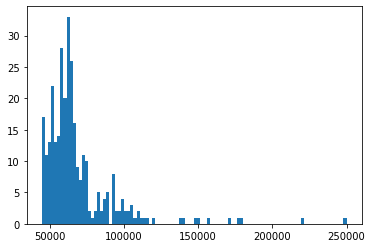

In [46]:
plt.hist(data[['Salary']], 100)
plt.show()

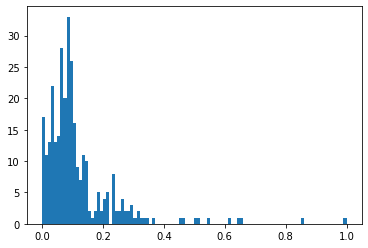

In [47]:
plt.hist(sc1_data, 100)
plt.show()